In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svmsource import frontiere, rand_gauss, rand_bi_gauss, plot_2d

from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets

from __future__ import division

import matplotlib
matplotlib.use('TkAgg')

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.backends.backend_tkagg import NavigationToolbar2TkAgg
from matplotlib.figure import Figure
from matplotlib.contour import ContourSet

import tkinter as Tk
import sys

from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

c:\program files\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\program files\python35\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Question 1:


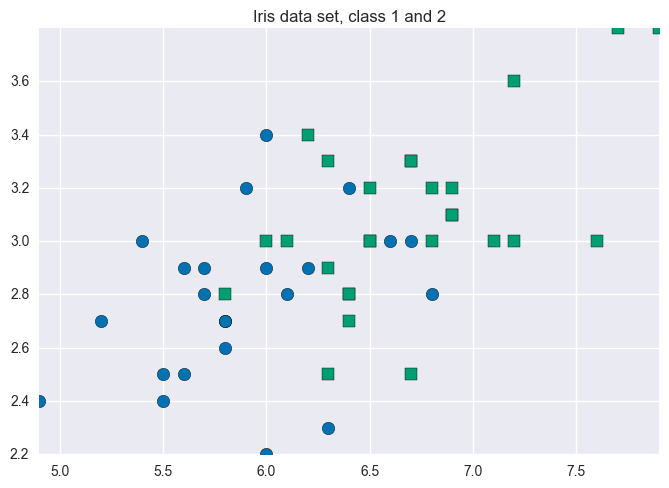

Question 2:


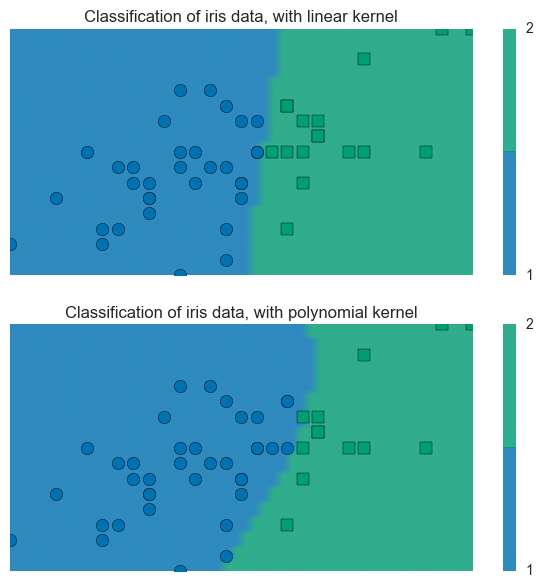

In [12]:
###############################################################################
# Q1： classify iris dataset, linear kernel
###############################################################################

print("Question 1:")

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
[n,p]=X.shape

# split train test
ind=np.random.permutation(n)
X_train=X[ind][0:int(n/2),0:2]
y_train=y[ind][0:int(n/2)]
X_test=X[ind][int(n/2):,0:2]
y_test=y[ind][int(n/2):]

# fit the model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# predict labels
y_pred = clf.predict(X_test)

# display your results using plot_2d and frontiere
plt.close("all")
plt.ion()
plt.title('Iris data set, class 1 and 2')
plot_2d(X_test, y_test)
plt.show()

print("Question 2:")

def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf.predict(xx.reshape(1, -1))

plt.figure(2, figsize=(8,7))
plt.subplot(211)
plt.title("Classification of iris data, with linear kernel")
frontiere(f, X_test, y_pred, w=None, step=50, alpha_choice=1)

###############################################################################
# Q2: compare with the case by using polynomial kernel
###############################################################################

# fit the model
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

# predict labels
y_pred = clf.predict(X_test)

plt.subplot(212)
plt.title("Classification of iris data, with polynomial kernel")
frontiere(f, X_test, y_pred, w=None, step=50, alpha_choice=1)

In [5]:
"""
==========
Libsvm GUI
==========

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.

"""

print (__doc__)

# Author: Peter Prettenhoer <peter.prettenhofer@gmail.com>
#
# License: BSD Style.


y_min, y_max = -50, 50
x_min, x_max = -50, 50


class Model(object):

    """The Model which hold the data. It implements the
    observable in the observer pattern and notifies the
    registered observers on change event.
    """

    def __init__(self):
        self.observers = []
        self.surface = None
        self.data = []
        self.cls = None
        self.surface_type = 0

    def changed(self, event):
        """Notify the observers. """
        for observer in self.observers:
            observer.update(event, self)

    def add_observer(self, observer):
        """Register an observer. """
        self.observers.append(observer)

    def set_surface(self, surface):
        self.surface = surface


class Controller(object):

    def __init__(self, model):
        self.model = model
        self.kernel = Tk.IntVar()
        self.surface_type = Tk.IntVar()
        # Whether or not a model has been fitted
        self.fitted = False

    def fit(self):
        print ("fit the model")
        train = np.array(self.model.data)
        X = train[:, :2]
        y = train[:, 2]

        C = float(self.complexity.get())
        gamma = float(self.gamma.get())
        coef0 = float(self.coef0.get())
        degree = int(self.degree.get())
        kernel_map = {0: "linear", 1: "rbf", 2: "poly"}
        if len(np.unique(y)) == 1:
            clf = svm.OneClassSVM(kernel=kernel_map[self.kernel.get()],
                                  gamma=gamma, coef0=coef0, degree=degree)
            clf.fit(X)
        else:
            clf = svm.SVC(kernel=kernel_map[self.kernel.get()], C=C,
                          gamma=gamma, coef0=coef0, degree=degree)
            clf.fit(X, y)
        if hasattr(clf, 'score'):
            print ("Accuracy:", clf.score(X, y) * 100)
        X1, X2, Z = self.decision_surface(clf)
        self.model.clf = clf
        self.model.set_surface((X1, X2, Z))
        self.model.surface_type = self.surface_type.get()
        self.fitted = True
        self.model.changed("surface")

    def decision_surface(self, cls):
        delta = 1
        x = np.arange(x_min, x_max + delta, delta)
        y = np.arange(y_min, y_max + delta, delta)
        X1, X2 = np.meshgrid(x, y)
        Z = cls.decision_function(np.c_[X1.ravel(), X2.ravel()])
        Z = Z.reshape(X1.shape)
        return X1, X2, Z

    def clear_data(self):
        self.model.data = []
        self.fitted = False
        self.model.changed("clear")

    def add_example(self, x, y, label):
        self.model.data.append((x, y, label))
        self.model.changed("example_added")

        # update decision surface if already fitted.
        self.refit()

    def refit(self):
        """Refit the model if already fitted. """
        if self.fitted:
            self.fit()


class View(object):

    """Test docstring. """

    def __init__(self, root, controller):
        f = Figure()
        ax = f.add_subplot(111)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim((x_min, x_max))
        ax.set_ylim((y_min, y_max))
        canvas = FigureCanvasTkAgg(f, master=root)
        canvas.show()
        canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)
        canvas._tkcanvas.pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)
        canvas.mpl_connect('button_press_event', self.onclick)
        toolbar = NavigationToolbar2TkAgg(canvas, root)
        toolbar.update()
        self.controllbar = ControllBar(root, controller)
        self.f = f
        self.ax = ax
        self.canvas = canvas
        self.controller = controller
        self.contours = []
        self.c_labels = None
        self.plot_kernels()

    def plot_kernels(self):
        self.ax.text(-50, -60, "Linear: $u^T v$")
        self.ax.text(-20, -60, "RBF: $\exp (-\gamma \| u-v \|^2)$")
        self.ax.text(10, -60, "Poly: $(\gamma \, u^T v + r)^d$")

    def onclick(self, event):
        if event.xdata and event.ydata:
            if event.button == 1:
                self.controller.add_example(event.xdata, event.ydata, 1)
            elif event.button == 3:
                self.controller.add_example(event.xdata, event.ydata, -1)

    def update(self, event, model):
        if event == "example_added":
            x, y, l = model.data[-1]
            if l == 1:
                color = 'w'
            elif l == -1:
                color = 'k'
            self.ax.plot([x], [y], "%so" % color, scalex=0.0, scaley=0.0)

        if event == "clear":
            self.ax.clear()
            self.ax.set_xticks([])
            self.ax.set_yticks([])
            self.contours = []
            self.c_labels = None
            self.plot_kernels()

        if event == "surface":
            self.remove_surface()
            self.plot_support_vectors(model.clf.support_vectors_)
            self.plot_decision_surface(model.surface, model.surface_type)

        self.canvas.draw()

    def remove_surface(self):
        """Remove old decision surface."""
        if len(self.contours) > 0:
            for contour in self.contours:
                if isinstance(contour, ContourSet):
                    for lineset in contour.collections:
                        lineset.remove()
                else:
                    contour.remove()
            self.contours = []

    def plot_support_vectors(self, support_vectors):
        """Plot the support vectors by placing circles over the
        corresponding data points and adds the circle collection
        to the contours list."""
        cs = self.ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
                             s=80, edgecolors="k", facecolors="none")
        self.contours.append(cs)

    def plot_decision_surface(self, surface, type):
        X1, X2, Z = surface
        if type == 0:
            levels = [-1.0, 0.0, 1.0]
            linestyles = ['dashed', 'solid', 'dashed']
            colors = 'k'
            self.contours.append(self.ax.contour(X1, X2, Z, levels,
                                                 colors=colors,
                                                 linestyles=linestyles))
        elif type == 1:
            self.contours.append(self.ax.contourf(X1, X2, Z, 10,
                                                  cmap=matplotlib.cm.bone,
                                                  origin='lower',
                                                  alpha=0.85))
            self.contours.append(self.ax.contour(X1, X2, Z, [0.0],
                                                 colors='k',
                                                 linestyles=['solid']))
        else:
            raise ValueError("surface type unknown")


class ControllBar(object):

    def __init__(self, root, controller):
        fm = Tk.Frame(root)
        kernel_group = Tk.Frame(fm)
        Tk.Radiobutton(kernel_group, text="Linear", variable=controller.kernel,
                       value=0, command=controller.refit).pack(anchor=Tk.W)
        Tk.Radiobutton(kernel_group, text="RBF", variable=controller.kernel,
                       value=1, command=controller.refit).pack(anchor=Tk.W)
        Tk.Radiobutton(kernel_group, text="Poly", variable=controller.kernel,
                       value=2, command=controller.refit).pack(anchor=Tk.W)
        kernel_group.pack(side=Tk.LEFT)

        valbox = Tk.Frame(fm)
        controller.complexity = Tk.StringVar()
        controller.complexity.set("1.0")
        c = Tk.Frame(valbox)
        Tk.Label(c, text="C:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(c, width=6, textvariable=controller.complexity).pack(
            side=Tk.LEFT)
        c.pack()

        controller.gamma = Tk.StringVar()
        controller.gamma.set("0.01")
        g = Tk.Frame(valbox)
        Tk.Label(g, text="gamma:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(g, width=6, textvariable=controller.gamma).pack(side=Tk.LEFT)
        g.pack()

        controller.degree = Tk.StringVar()
        controller.degree.set("3")
        d = Tk.Frame(valbox)
        Tk.Label(d, text="degree:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(d, width=6, textvariable=controller.degree).pack(side=Tk.LEFT)
        d.pack()

        controller.coef0 = Tk.StringVar()
        controller.coef0.set("0")
        r = Tk.Frame(valbox)
        Tk.Label(r, text="coef0:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(r, width=6, textvariable=controller.coef0).pack(side=Tk.LEFT)
        r.pack()
        valbox.pack(side=Tk.LEFT)

        cmap_group = Tk.Frame(fm)
        Tk.Radiobutton(cmap_group, text="Hyperplanes",
                       variable=controller.surface_type, value=0,
                       command=controller.refit).pack(anchor=Tk.W)
        Tk.Radiobutton(cmap_group, text="Surface",
                       variable=controller.surface_type, value=1,
                       command=controller.refit).pack(anchor=Tk.W)

        cmap_group.pack(side=Tk.LEFT)

        train_button = Tk.Button(fm, text='Fit', width=5,
                                 command=controller.fit)
        train_button.pack()
        fm.pack(side=Tk.LEFT)
        Tk.Button(fm, text='Clear', width=5,
                  command=controller.clear_data).pack(side=Tk.LEFT)


def main(argv):
    root = Tk.Tk()
    model = Model()
    controller = Controller(model)
    root.wm_title("Scikit-learn Libsvm GUI")
    view = View(root, controller)
    model.add_observer(view)
    Tk.mainloop()

if __name__ == "__main__":
    main(sys.argv)



Libsvm GUI

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.


fit the model
Accuracy: 80.0
fit the model
Accuracy: 82.6086956522
fit the model
Accuracy: 82.9787234043
fit the model
Accuracy: 83.3333333333
fit the model
Accuracy: 83.6734693878
fit the model
Accuracy: 84.0
fit the model
Accuracy: 84.3137254902
fit the model
Accuracy: 84.6153846154
fit the model
Accuracy: 84.9056603774
fit the model
Accuracy: 85.1851851852
fit the model
Accuracy: 85.4545454545
fit the model
Accuracy: 85.7142857143
fit the model
Accuracy: 85.9649122807
fit the model
Accuracy: 86.2068965517
fit the model
Accuracy: 86.4406779661
fit the model
Accuracy: 86.6666666667
fit the

In [13]:
# A l’aide d’un noyau linéaire et en diminuant le paramètre C qu’observez vous ?
print("C is the balance parameter, which controls the weights of 'maximize the gap between two supporting planes' and 'minimize the error of slack variables'")
print("When C decreases, it indicates that we focus more on maximizing the gap, and allow larger error caused by slack variables.")
print("Then we see from the classification result that the gap of supporting planes becomes larger, by ignoring more outliers.")

C is the balance parameter, which controls the weights of 'maximize the gap between two supporting planes' and 'minimize the error of slack variables'
When C decreases, it indicates that we focus more on maximizing the gap, and allow larger error caused by slack variables.
Then we see from the classification result that the gap of supporting planes becomes larger, by ignoring more outliers.


c:\program files\python35\lib\site-packages\ipykernel\__main__.py:53: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.285s
Chance level : 0.66106442577
Accuracy : 0.899441340782


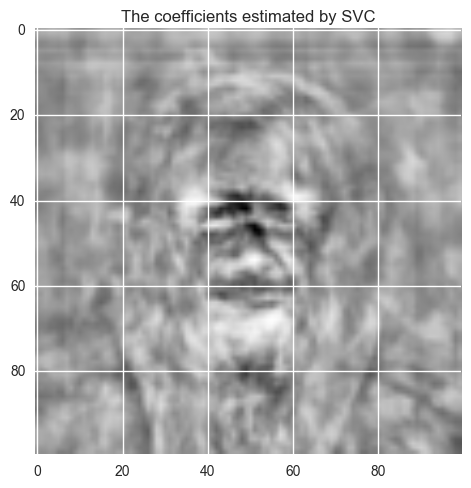

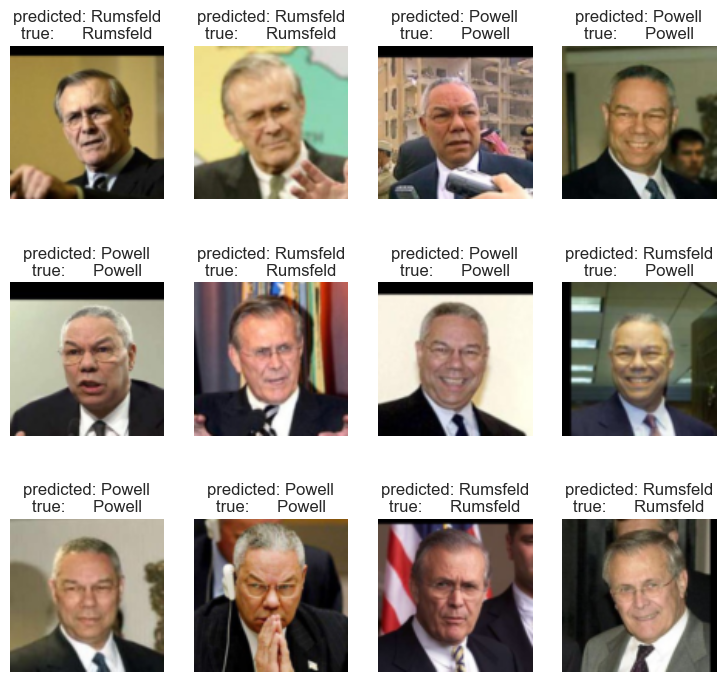

Fitting and predicting with linear kernel, C=0.000010
done in 0.664s
Fitting and predicting with linear kernel, C=0.000100
done in 0.617s
Fitting and predicting with linear kernel, C=0.001000
done in 0.618s
Fitting and predicting with linear kernel, C=0.010000
done in 0.607s
Fitting and predicting with linear kernel, C=0.100000
done in 0.602s
Fitting and predicting with linear kernel, C=1.000000
done in 0.602s
Fitting and predicting with linear kernel, C=10.000000
done in 0.617s
Fitting and predicting with linear kernel, C=100.000000
done in 0.617s
Fitting and predicting with linear kernel, C=1000.000000
done in 0.617s
Fitting and predicting with linear kernel, C=10000.000000
done in 0.627s
Fitting and predicting with linear kernel, C=100000.000000
done in 0.622s


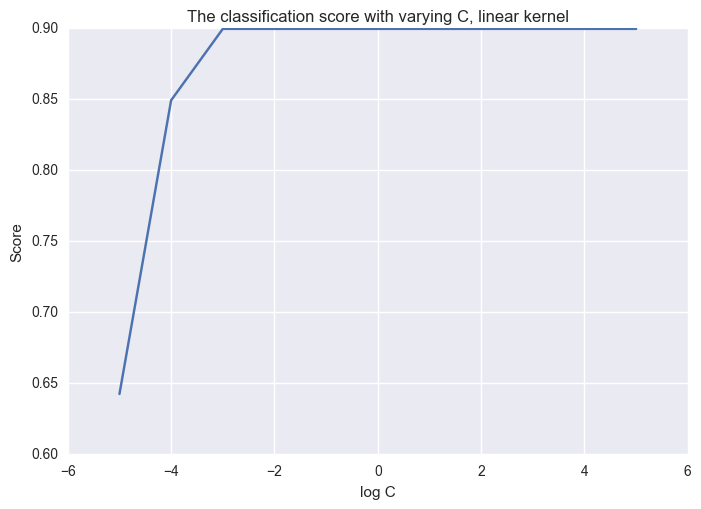

Fitting and predicting after adding 0 nuisance features
done in 0.621s
Fitting and predicting after adding 500 nuisance features
done in 0.685s
Fitting and predicting after adding 1000 nuisance features
done in 0.781s
Fitting and predicting after adding 1500 nuisance features
done in 0.832s
Fitting and predicting after adding 2000 nuisance features
done in 0.865s
Fitting and predicting after adding 2500 nuisance features
done in 0.903s
Fitting and predicting after adding 3000 nuisance features
done in 0.962s
Fitting and predicting after adding 3500 nuisance features
done in 1.024s
Fitting and predicting after adding 4000 nuisance features
done in 1.051s
Fitting and predicting after adding 4500 nuisance features
done in 1.148s
Fitting and predicting after adding 5000 nuisance features
done in 1.127s
Fitting and predicting after adding 5500 nuisance features
done in 1.172s
Fitting and predicting after adding 6000 nuisance features
done in 1.239s
Fitting and predicting after adding 6500 n

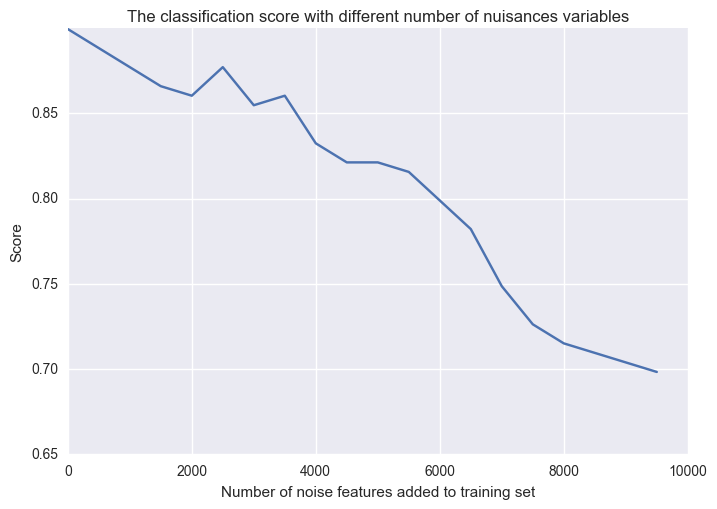

Fitting and predicting with RBF kernel, C=0.000010
done in 0.522s
Fitting and predicting with RBF kernel, C=0.000100
done in 0.533s
Fitting and predicting with RBF kernel, C=0.001000
done in 0.586s
Fitting and predicting with RBF kernel, C=0.010000
done in 0.757s
Fitting and predicting with RBF kernel, C=0.100000
done in 0.752s
Fitting and predicting with RBF kernel, C=1.000000
done in 0.774s
Fitting and predicting with RBF kernel, C=10.000000
done in 0.832s
Fitting and predicting with RBF kernel, C=100.000000
done in 0.787s
Fitting and predicting with RBF kernel, C=1000.000000
done in 0.792s
Fitting and predicting with RBF kernel, C=10000.000000
done in 0.769s
Fitting and predicting with RBF kernel, C=100000.000000
done in 0.787s


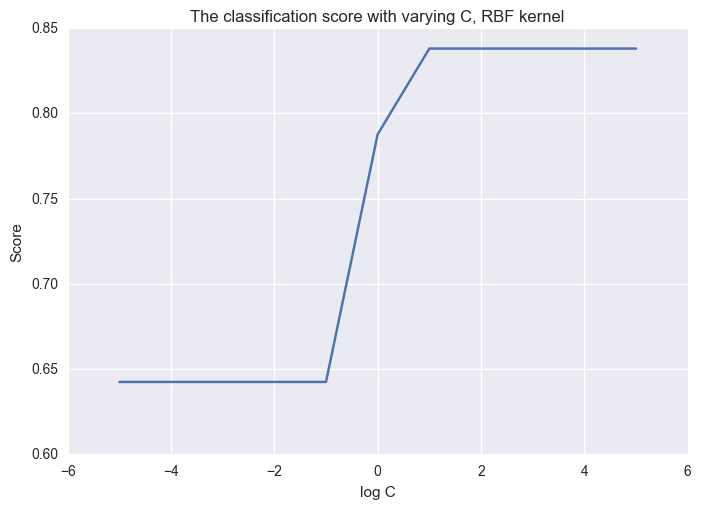

done in 1.287s
done in 0.332s
done in 0.285s
done in 0.417s
done in 0.462s
done in 0.495s
done in 0.590s
done in 0.688s
done in 0.751s


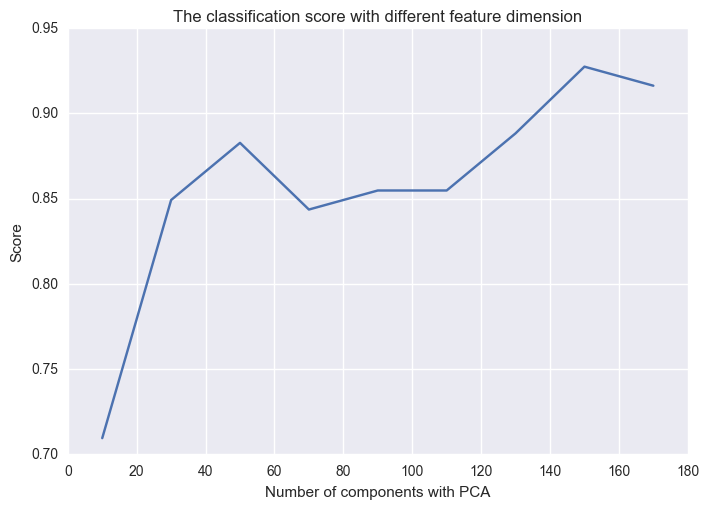

NameError: name 'C' is not defined

In [5]:
###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=False)
# data_home='.'
# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape
# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
# names = ['Tony Blair', 'Colin Powell']
names = ['Donald Rumsfeld', 'Colin Powell']
idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features
# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)
# or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)
# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)
indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] / 2], indices[X.shape[0] / 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]

####################################################################
# Quantitative evaluation of the model quality on the test set
print ("Fitting the classifier to the training set")
t0 = time()
# fit a classifier, 
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
print ("Predicting the people names on the testing set")
t0 = time()
# predict labels for the X_test images
y_pred = clf.predict(X_test)

print ("done in %0.3fs" % (time() - t0))
print ("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print ("Accuracy : %s" % clf.score(X_test, y_test))

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))
pl.title("The coefficients estimated by SVC")

####################################################################
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.title("Classification results of Donald Rumsfeld and Colin Powell")
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

###############################################################################
# QUESTION 5 : try various values for C in the SVC function and plot the error curve
###############################################################################

SCORE=[]
logC=[]
for i in range(-5,6):
    print("Fitting and predicting with linear kernel, C=%f" % 10**i)
    t0 = time()
    clf = SVC(kernel='linear',C=10**i)
    clf.fit(X_train, y_train)
    SCORE.append(clf.score(X_test, y_test))
    logC.append(i)
    print ("done in %0.3fs" % (time() - t0))
plt.close('all')
plt.figure(1)
plt.plot(logC,SCORE)
plt.xlabel("log C")
plt.ylabel("Score")
plt.title("The classification score with varying C, linear kernel")
plt.show()

###############################################################################
# QUESTION 6 : en ajoutant des variables de nuisances, montrez que la performance chute
###############################################################################

noise=np.random.normal(0,1,X_test.shape[0]*10000)
noise=np.reshape(noise,(X_test.shape[0],10000))
SCORE=[]
NOISE=[]
for i in range(0,10000,500):
    print("Fitting and predicting after adding %d nuisance features" % i)
    t0 = time()
    X_train_noise=np.c_[X_train,noise[0:X_train.shape[0],0:i]]
    X_test_noise=np.c_[X_test,noise[:,0:i]]
    clf = SVC(kernel='linear')
    clf.fit(X_train_noise, y_train)
    SCORE.append(clf.score(X_test_noise, y_test))
    NOISE.append(i)
    print ("done in %0.3fs" % (time() - t0))
plt.figure(2)
plt.plot(NOISE, SCORE)
plt.xlabel("Number of noise features added to training set")
plt.ylabel("Score")
plt.title("The classification score with different number of nuisances variables")
plt.show()

###############################################################################
# QUESTION 8.1 : quel est l’eﬀet du choix d’un noyau non-linéaire RBF sur la prédiction? 
###############################################################################

SCORE=[]
logC=[]
for i in range(-5,6):
    print("Fitting and predicting with RBF kernel, C=%f" % 10**i)
    t0 = time()
    clf = SVC(kernel='rbf',C=10**i)
    clf.fit(X_train, y_train)
    SCORE.append(clf.score(X_test, y_test))
    logC.append(i)
    print ("done in %0.3fs" % (time() - t0))
plt.close('all')
plt.figure(3)
plt.plot(logC,SCORE)
plt.xlabel("log C")
plt.ylabel("Score")
plt.title("The classification score with varying C, RBF kernel")
plt.show()

###############################################################################
# QUESTION 8.2 : try reducing the dimension using sklearn.decomposition.RandomizedPCA and compute again an SVM classifer
###############################################################################

SCORE=[]
N_C=[]
for n_components in range(10,X_train.shape[0],20):
    t0 = time()
    pca = PCA( n_components=n_components, svd_solver='randomized',whiten=True)##problem!
#     print("Extracting the %d features from %d" % (pca.components_[0], X_train.shape[1])," with RandomizedPCA")
    X_train_PCA=pca.fit_transform(X_train)
    X_test_PCA=pca.transform(X_test)
    clf = SVC(kernel='linear',C=1)
    clf.fit(X_train_PCA, y_train)
    SCORE.append(clf.score(X_test_PCA, y_test))
    N_C.append(n_components)
    print ("done in %0.3fs" % (time() - t0))
plt.close('all')
plt.figure(4)
plt.plot(N_C,SCORE)
plt.xlabel("Number of components with PCA")
plt.ylabel("Score")
plt.title("The classification score with different feature dimension")
plt.show()

###############################################################################
# QUESTION 9 : 
###############################################################################
clf = svm.SVC(kernel='linear',C=1,tol=0.001)
clf.fit(X_train, y_train)
cost=0.5*np.linalg.norm(clf.coef_[0],2)**2+C*sum(1-y_train*(np.dot(clf.coef_[0] , X_train) + clf.intercept_[0]))
# dual_w = np.dot(clf.dual_coef_ , clf.support_vectors_)[0]
# plt.figure(5)
# plt.plot(clf.coef_[0])
# plt.plot
# plt.show()

In [75]:
###############################################################################
# QUESTION 9 : 
###############################################################################
C=1
clf = svm.SVC(kernel='linear',C=C,tol=0.001)
clf.fit(X_train, y_train)
# cost1=0.5*np.linalg.norm(clf.coef_[0],2)**2
hinge=1-y_train*(np.dot(X_train,clf.coef_[0]) + clf.intercept_[0])
hinge=hinge[hinge>=0]
hinge
cost = 0.5*np.linalg.norm(clf.coef_[0],2)**2 + C*sum(hinge)
cost

aayyxx=0
for i in range(len(clf.dual_coef_[0])):
    for j in range(len(clf.dual_coef_[0])):
        aayyxx=aayyxx+clf.dual_coef_[0][i]*clf.dual_coef_[0][j]*y_train[clf.support_][i]*y_train[clf.support_][j]*np.dot(clf.support_vectors_[i,:] , clf.support_vectors_[j,:])
dual_cost = np.sum(clf.dual_coef_) - 0.5*aayyxx
print(cost,dual_cost)


57.0209274295 -0.0152937485979


In [73]:
clf.dual_coef_.shape
clf.support_vectors_.shape
dual_cost.shape
np.sum([[1,2],[3,4]])
aa.shape
sum(clf.dual_coef_).shape
clf.dual_coef_[0].shape
# hinge.shape
y_train[clf.support_ ].shape
clf.support_vectors_[0,:].shape
# (clf.dual_coef_[0] * y_train[clf.support_ ]).shape
np.dot(clf.support_vectors_[0,:] , clf.support_vectors_[0,:])

5588.6004054856494

w primal: [-0.00627018 -0.1799397 ] w dual: [-0.00627018 -0.1799397 ]
b primal: 0.920454321415 b dual: -0.00336361545197


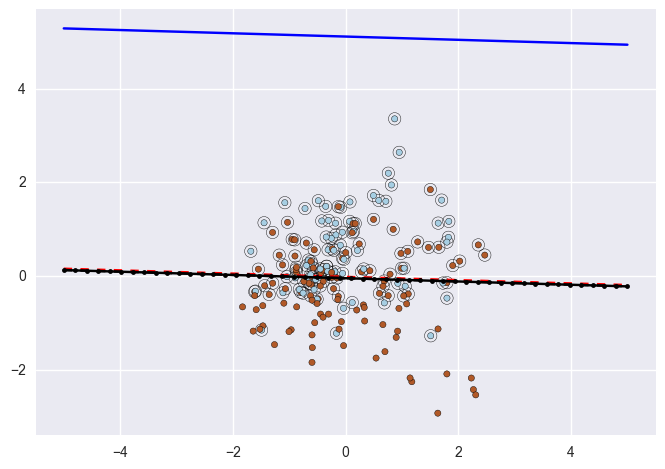

In [33]:
# aller plus loin
# Question 9&10
# print(__doc__)

# we create 40 separable points
# np.random.seed(0)
# X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
# Y = [0] * 20 + [1] * 20

pca = PCA( n_components=2, svd_solver='randomized',whiten=True)##problem!
X=pca.fit_transform(X_train)
Y=y_train
# X_test_PCA=pca.transform(X_test)

# fit the model
clf = svm.SVC(kernel='linear', C=0.01, tol=0.001)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# dual coeffs
dual_w = np.dot(clf.dual_coef_ , clf.support_vectors_)[0]
dual_b = -0.5*(np.dot(np.transpose(dual_w) , clf.support_vectors_[1,:]) 
               + np.dot(np.transpose(dual_w) , clf.support_vectors_[2,:]))
dual_a = -w[0] / w[1]
dual_yy = dual_a * xx - dual_b / w[1]

print("w primal:", w,"w dual:", dual_w)
print("b primal:", clf.intercept_[0],"b dual:", dual_b)

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'b-')
plt.plot(xx, dual_yy, 'r--')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k.-')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()